<h2>Spectrum</h2>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import get_window
from scipy.io import wavfile
import IPython

In [3]:
fs, x = wavfile.read("test.wav")
x = x / np.max(abs(x))

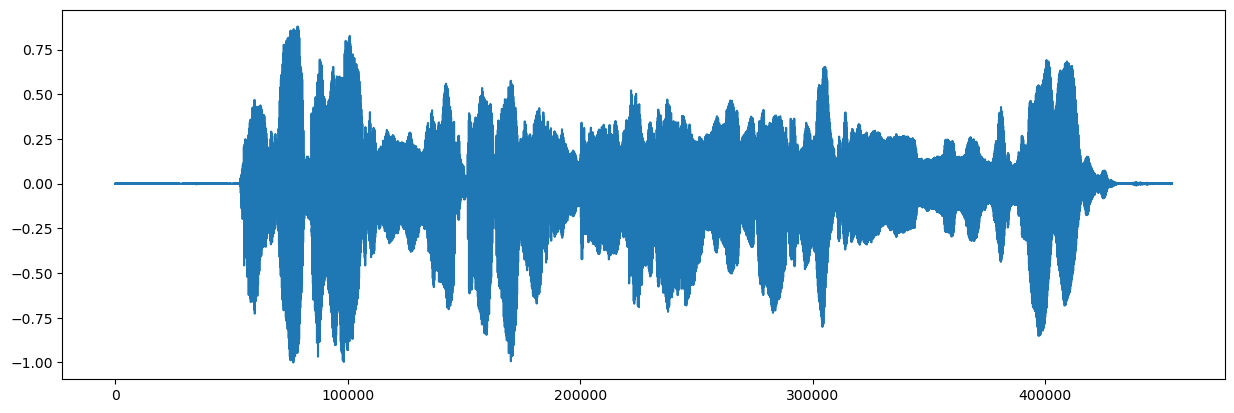

In [4]:
plt.figure().set_figwidth(15)
plt.plot(x)
IPython.display.Audio(x, rate=fs)

In [135]:
M=8191
N=8192
H=256

hM1 = int(math.floor((M + 1) / 2))
hM2 = int(math.floor(M / 2))
eps = np.finfo(float).eps

f = int(1500 * N / fs)

In [136]:
w  = get_window('hamming', M)
w = w / sum(w)

In [137]:
t = np.arange(len(spectrum)) * H / fs
fqs = np.arange(f) * fs / N

In [150]:
def computeSpectrum(x):
    spectrum = []

    l = 0
    while l < len(x) - M:
        y = x[l: l + M] * w

        fftBuffer = np.zeros(N)
        fftBuffer[: hM1] = y[hM2:] 
        fftBuffer[N - hM2:] = y[: hM2]

        X = fft(fftBuffer)
        absX = abs(X[:f])
        absX[absX < np.finfo(float).eps] = np.finfo(float).eps
        mX = 20 * np.log10(absX)
        spectrum.append(mX)

        l += H
    
    return spectrum

In [151]:
spectrum = computeSpectrum(x)

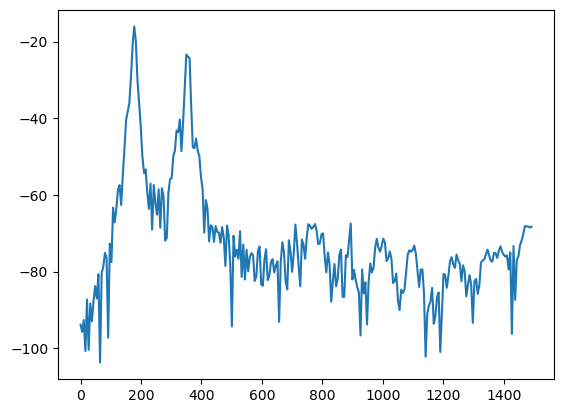

In [152]:
plt.plot(fqs, spectrum[300])

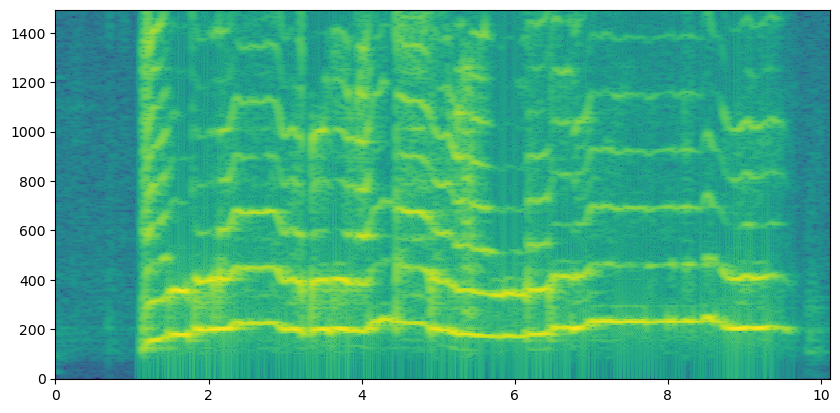

In [153]:
spectrum = np.array(spectrum)
plt.figure().set_figwidth(10)
plt.pcolormesh(t, fqs, spectrum.T)